In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [61]:
np.random.seed(0)  # For reproducibility
n = 100
m = 300
# A = np.random.randn(m, n)
A = np.random.rand(m, n)
b = A @ np.ones(n) / 2
# c = -np.random.randn(n)
c = -np.random.rand(n)

In [19]:
A, b, c

(array([[0.5488135 , 0.71518937, 0.60276338, ..., 0.02010755, 0.82894003,
         0.00469548],
        [0.67781654, 0.27000797, 0.73519402, ..., 0.25435648, 0.05802916,
         0.43441663],
        [0.31179588, 0.69634349, 0.37775184, ..., 0.86219152, 0.97291949,
         0.96083466],
        ...,
        [0.52814915, 0.71957599, 0.08243408, ..., 0.87212171, 0.57398544,
         0.97802605],
        [0.48905238, 0.58182107, 0.73918226, ..., 0.16899552, 0.6885889 ,
         0.56816121],
        [0.14348573, 0.77819159, 0.31177084, ..., 0.85290419, 0.73422955,
         0.63899742]], shape=(300, 100)),
 array([23.63969198, 26.40408781, 25.48159919, 23.637873  , 24.98615839,
        25.31142552, 24.27598008, 23.43305071, 26.08511539, 24.70578511,
        24.02365558, 25.63925988, 26.06015492, 27.2463367 , 24.8751549 ,
        27.82294652, 25.66873043, 24.16842366, 25.75142698, 24.41890375,
        23.90404132, 26.17953034, 26.18857955, 24.69909151, 24.47925673,
        26.26055288, 27.73

In [62]:
x = cp.Variable(n)
# constraints = [A @ x <= b, 0 <= x, x <= 1]
objective = cp.Minimize(c @ x)
problem = cp.Problem(objective, [A @ x <= b, 0 <= x, x <= 1])
problem.solve()

np.float64(-34.41722426062945)

In [63]:
problem.status, problem.value, x.value

('optimal',
 np.float64(-34.41722426062945),
 array([1.00000000e+00, 9.50418018e-01, 4.07318012e-11, 1.00000000e+00,
        8.10921843e-01, 1.00000000e+00, 1.00000000e+00, 7.41313700e-01,
        3.73637006e-11, 5.17668122e-01, 9.47947671e-10, 3.34131380e-11,
        1.14949678e-10, 1.41323499e-10, 1.00000000e+00, 1.00000000e+00,
        8.98099623e-11, 9.61766086e-02, 1.00000000e+00, 4.54702596e-11,
        2.68039015e-11, 4.79161058e-09, 1.00000000e+00, 2.31233759e-01,
        1.00000000e+00, 2.25908663e-11, 1.00000000e+00, 1.00000000e+00,
        6.48921804e-11, 4.77923546e-11, 1.00767818e-10, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.02647871e-01,
        6.61882357e-11, 1.00000000e+00, 2.33346666e-11, 6.51237839e-11,
        8.85585983e-01, 8.84938130e-01, 1.00000000e+00, 3.76257728e-11,
        1.00000000e+00, 2.52538933e-11, 1.47877823e-10, 1.34420504e-10,
        1.11452129e-10, 1.46712597e-10, 6.03415693e-01, 1.00000000e+00,
        1.00000000e

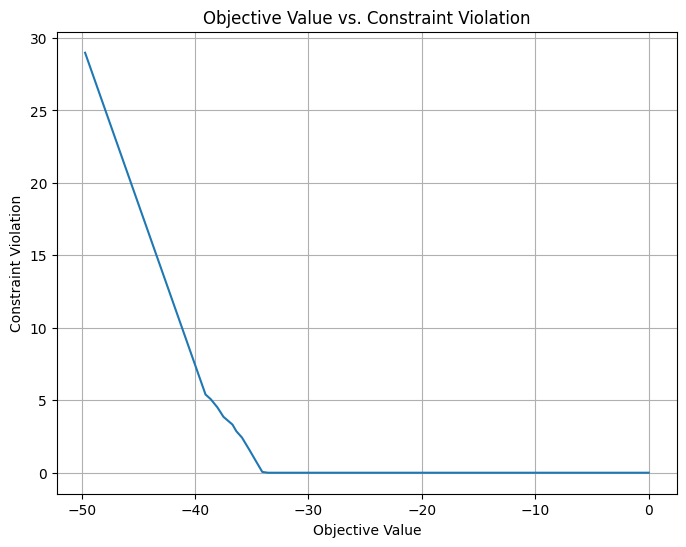

In [64]:
def get_obj_viol(t):
    threshold = t * np.ones(n)
    x_hat = np.where(x.value >= threshold, 1, 0)
    obj = c @ x_hat
    viol = np.maximum(np.max(A @ x_hat - b), 0)
    return obj, viol


ts = np.linspace(0, 1, 100)
objs = []
viols = []
for t in ts:
    obj, viol = get_obj_viol(t)
    objs.append(obj)
    viols.append(viol)

plt.figure(figsize=(8, 6))
plt.plot(objs, viols)
plt.xlabel("Objective Value")
plt.ylabel("Constraint Violation")
plt.title("Objective Value vs. Constraint Violation")
plt.grid()

In [65]:
L = c @ x.value  # lower bound on p*
feasibles = [objs[i] for i in range(len(viols)) if viols[i] < 0.1]
U = np.min(feasibles)  # upper bound on p*
L, U

(np.float64(-34.41722426062945), np.float64(-34.07065285666397))

In [66]:
gap = U - L
gap

np.float64(0.34657140396548414)